# Исследование надежности заемщиков.

Банк-заказчик хочет улучшить модель кредитного скоринга в кредитном отделе - специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования**
Проверить влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

**Ход исследования**
Данные от банка — статистика о платёжеспособности клиентов получаем из файла `data.csv`. О качестве данных ничего не известно. Поэтому перед исслеванием сделаем обзор данных на ошибки и, при их наличии, поищем возможность исправить самые критичные.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

### Шаг 1. Обзор данных

Составим представление о даных, которые мы получили.

In [1]:
#импортируем библиотеку pandas, даём ей сокращённое наименование pd
import pandas as pd

#читаем присланную таблицу и сохраняем в переменную data
data = pd.read_csv('/datasets/data.csv')

#выведем информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 21525 строк и двенадцать столбцов.
В названиях столбцов нет нарушений. Количество значий в столбцах различается - сушествуют пропуски.
Типы данных int64, float64 и object. 

Описание данных:
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

In [2]:
#выводим первые 10 строк для ознакомления
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


#### Выводы

В столбцах встречаются:
- пропущенные значения, 
- отрицательные значения там, где их, предположительно, быть не должно,
- испльзуются строчные буквы,
- неудобный формат данных некоторых столбцов,
- не во всех столбцах понятная информация,
- есть дубликаты.

### Шаг 2.1 Заполнение пропусков

Проверим в каких столбцах есть пропуски.

In [3]:
#подсчёт пропущеных значений
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Количество пропусков в столбцах 'days_employed' и 'total_income' одинаково. Их по 2174 - это примерно 10%. Проверим что это за пропуски:

In [4]:
#выведем на экран первые пять строк с пропущенными значениями в столбце 'days_employed'
data[data['days_employed'].isna()].head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [5]:
#выведем на экран первые пять строк с пропущенными значениями в столбце 'total_income'
data[data['total_income'].isna()].head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [6]:
#проверим сколько строк имеют сразу два пропуска одновременно
shape_nan = data[(data['days_employed'].isna()) & (data['total_income'].isna())].shape[0]
print(f'количество строк с двумя пропусками: {shape_nan}')

количество строк с двумя пропусками: 2174


Пропуски имеют тип NaN и они в одних и тех же строках. *Возможной причиной* того, что данные об отработанных днях и зарплате не заполняютя одновременно, потому, что человек сейчас является безработным.

Просмотрим самые большие и самые малые значения столбца 'total_income':

In [7]:
# исследуем распределение значений в столбце 'total_income' с помощью метода describe()
data['total_income'].describe()

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

Разница между значениями весьма большая, поэтому заполним пропуски медианным значением, оно больше подходит, если есть большие количественные различия в данных.

In [8]:
#вычисляем медианное значение
median_income = data['total_income'].median()
#заполняем пропуски медианным значением
data['total_income'] = data['total_income'].fillna(median_income)
#проверяем пропущенные значения
total_income_na = data['total_income'].isna().sum()
print(f'количество пропусков в столбце total_income : {total_income_na}')

количество пропусков в столбце total_income : 0


Пропущенные занчения 'total_income' устранены, переходим к самим данным.

In [10]:
# найдем медианы по income_type
income_mean = data.groupby('income_type')['total_income'].mean()
income_mean

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        168290.760408
компаньон          196683.153073
пенсионер          137972.581061
предприниматель    322090.541240
сотрудник          159754.181986
студент             98201.625314
Name: total_income, dtype: float64

### Шаг 2.2 Проверка данных на аномалии и исправления.

#### Обзор стобцов


In [11]:
#определим какие значения есть в 'children' и как часто они встречаются
data.groupby('children')['children'].count()

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

В столбце 'children' есть значение '-1' встечется 47 раз, значение '20' 76 раз. 
Такие ошибки могут возникать в процессе записи или выгрузки данных. В сумме эти данные составляют меньше 1%. 
Можем удалить строки с этими значениями, на анализ это не должно иметь сильного влияния.

In [12]:
#оставляем в таблице все строки, кроме тех, что содержат в столбце 'children' значения '-1' и '20'
data = data.loc[(data['children'] != -1) & (data['children'] != 20)]
#проверяем результат удаления '-1' и '20'
data.groupby('children')['children'].count()

children
0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Столбец 'children' теперь не содержит странных показателей.

Идем далее - изучим данные в 'days_employed'

In [13]:
#определим какие значения есть в 'days_employed'
data['days_employed']

0         -8437.673028
1         -4024.803754
2         -5623.422610
3         -4124.747207
4        340266.072047
             ...      
21520     -4529.316663
21521    343937.404131
21522     -2113.346888
21523     -3112.481705
21524     -1984.507589
Name: days_employed, Length: 21402, dtype: float64

В столбце отработанных дней есть отрицательные значения, пропуски и не понятный вид отображения данных.
Скорее всего отрицательные значения появились в связи с ошибкой при записи данных (хорошо бы узнать об этом у разработчиков), возьмём модуль по всему столбцу и попробуем сгупировать с другими категориями.

In [14]:
# используем функцию abs(), чтобы избавится от отрицательных значений
data['days_employed'] = abs(data['days_employed'])
# проверяем количество отрицательных знчений
negative = data[data['days_employed'] < 0]['days_employed'].count()
print(f'Количество отрицательных значений: {negative}')

Количество отрицательных значений: 0


Чтобы сделать анализ заполним пропуски медианным значением, оно подойдет лучше, чем среднеарифметическое, т к данные количественно сильно различаются.

In [15]:
#вычисляем медианное значение
median_days_employed = data['days_employed'].median()
#заполняем пропуски медианным значением
data['days_employed'] = data['days_employed'].fillna(median_days_employed)
#проверяем пропущенные значения
total_days_na = data['days_employed'].isna().sum()
print(f'количество пропусков в столбце days_employed : {total_days_na}')

количество пропусков в столбце days_employed : 0


Сгрупируем данные по отработанным дням и доходу, для более детального изучения данных

In [16]:
# воспользуемся методом groupby по нескольким столбцам и применим к ним разные функции методом agg()
import warnings
warnings.filterwarnings('ignore')

data.groupby('income_type')['days_employed', 'income_type'].agg({'days_employed': 'sum',
                                                                 'income_type': 'count',})

,days_employed,income_type
income_type,,
безработный,7.328273e+05,2
в декрете,3.296760e+03,1
госслужащий,4.768926e+06,1453
компаньон,1.074448e+07,5054
пенсионер,1.252571e+09,3839
предприниматель,2.716100e+03,2
сотрудник,2.553500e+07,11050
студент,5.787516e+02,1


Выходит, что 3839 пенсионеров отработали 1252571000 дней, что равно примерно 900 лет каждый. Безработные отработали больше 1000 лет.
Т к данные показывают высокую степень нереалистичности, чситаю их не пригодными для анализа.

Переходим к столбцу возрастов клиентов:

In [17]:
#импортируем библиотеку numpy и отсортируем уникальные значения для удобства
import numpy as np
print(np.sort(data['dob_years'].unique()))

[ 0 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75]


In [18]:
#подсчет нулевых значений
null_age = data.loc[data.loc[:,'dob_years'] == 0]['dob_years'].count()
print(f'ноль встречается: {null_age} раз')

ноль встречается: 100 раз


Столбец с возрастом содержит 100 раз нулевое значение. Поскольку с 19 до 75 возраст изменяется на '+1', заполним нулевые значения средним арифметическим.

In [19]:
# вычислим медиану
mean_dob_years = data['dob_years'].mean()
# заполним медианой нулевые значения через умную индексацию loc
data.loc[data[ 'dob_years'] == 0, 'dob_years'] = mean_dob_years
print(np.sort(data['dob_years'].unique()))

[19.         20.         21.         22.         23.         24.
 25.         26.         27.         28.         29.         30.
 31.         32.         33.         34.         35.         36.
 37.         38.         39.         40.         41.         42.
 43.         43.30020559 44.         45.         46.         47.
 48.         49.         50.         51.         52.         53.
 54.         55.         56.         57.         58.         59.
 60.         61.         62.         63.         64.         65.
 66.         67.         68.         69.         70.         71.
 72.         73.         74.         75.        ]


Данные по возрасту исправили. Тип данных на целочисленный изменим позже в разделе 'Изменение типов данных'.

Далее столбец 'education':

In [20]:
#вывод уникальных значений столбца 'education'
display(data['education'].unique())
#вывод уникальных значений столбца 'education_id'
data['education_id'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

array([0, 1, 2, 3, 4])

Столбец 'education' соделжит дубликаты и используются заглавные буквы. В результате удаления дубликатов в столбце 'education' дложно остаться пять категорий.

In [21]:
#вывод уникальных значений столбца 'family_status'
display(data['family_status'].unique())
#вывод уникальных значений столбца 'family_status_id'
data['family_status_id'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

array([0, 1, 2, 3, 4])

В значениях столбца 'family_status' пять категорий. Необходимо убрать заглавную букву в категории 'Не женат / не замужем', для приведения к общему стилю.

In [22]:
#вывод уникальных значений столбца 'gender'
display(data['gender'].unique())

array(['F', 'M', 'XNA'], dtype=object)

В столбце 'gender' есть одна неизветная категория. Всего одно значение, заменим его на категорию F(F или M не имеет значения). Для анализа это несущественно.

In [23]:
#заменим строку со значением 'XNA' и проверим
data.loc[data['gender'] == 'XNA',['gender']] = 'F'
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
#вывод уникальных значений столбца 'income_type'
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

С типом занятости все хорошо.

In [25]:
#вывод уникальных значений столбца 'debt'
data['debt'].unique()

array([0, 1])

Не понятно при каком значении была заложенность.

In [26]:
#вывод отсортированно столбца 'total_income' для проверки значений
display(data['total_income'].sort_values())

14585    2.066726e+04
13006    2.120528e+04
16174    2.136765e+04
1598     2.169510e+04
14276    2.189561e+04
             ...     
17178    1.711309e+06
20809    1.715018e+06
9169     1.726276e+06
19606    2.200852e+06
12412    2.265604e+06
Name: total_income, Length: 21402, dtype: float64

В столбце 'total_income' плохочитаемый формат. Необходимо поменять на целочисленный.

In [27]:
#вывод уникальных значений столбца 'purpose'
np.sort(data['purpose'].unique())

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

В 'purpose' много категорий, на первый взгляд - это могут быть дубликаты, но считаю, что это подкатегории. Регистр нижний, все данные читаемы.

### Шаг 2.3. Изменение типов данных.

In [28]:
#меняем типы данных столбцов 'total_income', 'dob_years', 'days_employed' на целочисленный
data['total_income'] = data['total_income'].astype('int64')
data['dob_years'] = data['dob_years'].astype('int64')
data['days_employed'] = data['days_employed'].astype('int64')
#проверяем
data.dtypes

children             int64
days_employed        int64
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int64
purpose             object
dtype: object

Все данные читаемы, переходим к дубликатам.

### Шаг 2.4. Удаление дубликатов.

Для поиска явных дубликатов - одинаковых строк используем метод duplicated() и drop_duplicates(). Они просты в использовании. Так же, чтобы индексы в таблице не сбивались используем сброс индексов - это параметр drop=True.
Неявные дубликаты встречались в с столбцах 'education' и 'purpose'. Они возникли на стадии заполнения данных клиентами, строчные буквы, схожие по смыслу категории займа, всё это мешает сделать анализ и нормально читать данные.
В 'education' применим метод str.lower(), он приведет к нижнему регистру все значения и дубликаты исчезнут.

#### Неявные дубликаты:

In [29]:
#иправим регистр на нижний в столбце 'education' методом str.lower() и проверим.
data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Как и должно было получится - 5 категорий.

In [30]:
#исправим регистр на нижний в столбце 'family_status' методом str.lower() и проверим.
data['family_status'] = data['family_status'].str.lower()
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

С 'family_status' тоже разобрались.

В столбце 'purpose' много категорий. Анализируя их получилось условно четыре основных целевых категории кредита: автомобиль, недвижимость, свадьба, образование. Далее в проекте сделаем основные категории и подкатегории используя это.

#### Явные дубликаты

In [31]:
#найдем явные дубликаты методом duplicated()
data.duplicated().sum()

71

In [32]:
#удалим явные дубликаты, обновим индексы и проверим.
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [33]:
#создаём словари 'образования' и 'семейного статуса'
education_catalog = data[['education_id','education']]
education_catalog = education_catalog.drop_duplicates().reset_index(drop=True)
display(education_catalog)

family_status = data [['family_status_id','family_status']]
family_status = family_status.drop_duplicates().reset_index(drop=True)
family_status

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


In [34]:
#удаляем столбцы 'education', 'family_status' из исходной таблицы, в ней остаются 'education_id', 'family_status_id'
data = data.drop(['education', 'family_status'], axis=1)
data.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.6. Категоризация дохода.

Отсортируем килентов по категориям 'A' 'B' 'C' 'D' 'E' в зависмости от дохода, так легче будет категоризировать заёмщиков.

In [35]:
# создаем функцию, которая на вход получет доход заёмщика и по его величине возвращает категорию
def income_category (income):
    if 0 <= income <= 30000:
        return 'E'
    elif 30001 <= income <= 50000:
        return 'D'
    elif 50001 <= income <= 200000:
        return 'C'
    elif 200001 <= income <= 1000000:
        return 'B'
    else: 
        return 'A'
# применим метод apply() для столбца 'total_income' и запишем результат в новый столбец 'total_income_category'
# выведем первые 5 строк таблицы для проверки
data['total_income_category'] = data['total_income'].apply(income_category)
data.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Шаг 2.7. Категоризация целей кредита.

В столбце 'purpose', как раньше предположили, находятся подкатегории. Присвоим им более общие категории, чтобы данные можно было легче изучать. Категории: 'операции с автомобилем', 'получение образования', 'проведение свадьбы', 'операции с недвижимостью'.

In [36]:
# создаём спики подкатегорий, сортируя их вручную по смыслу
subcategory_auto = ['автомобили',
                    'автомобиль',
                    'на покупку автомобиля',
                    'на покупку подержанного автомобиля',
                    'на покупку своего автомобиля',
                    'приобретение автомобиля',
                    'свой автомобиль',
                    'сделка с автомобилем',
                    'сделка с подержанным автомобилем'
                    ]
subcategory_education = ['высшее образование',
                         'дополнительное образование',
                         'заняться высшим образованием',
                         'заняться образованием',
                         'образование',
                         'получение высшего образования',
                         'получение дополнительного образования',
                         'получение образования',
                         'профильное образование'
                         ]
    
subcategory_wedding = ['на проведение свадьбы',
                       'свадьба',
                       'сыграть свадьбу'
                       ]
subcategory_estate = ['недвижимость',
                      'операции с жильем',
                      'операции с коммерческой недвижимостью',
                      'операции с недвижимостью',
                      'операции со своей недвижимостью',
                      'покупка жилой недвижимости',
                      'покупка жилья',
                      'покупка жилья для сдачи',
                      'покупка жилья для семьи',
                      'покупка коммерческой недвижимости',
                      'покупка недвижимости','покупка своего жилья',
                      'строительство жилой недвижимости',
                      'строительство недвижимости',
                      'строительство собственной недвижимости',
                      'жилье',
                      'ремонт жилью'
                      ]

# создадим функцию, которая будет получать на вход строку из таблицы, брать из нее занчение 'purpose',
# далее в цикле проходит по каждому списку подкатегорий и, если видит совпадение, возвращает название категории
def function_subcategory(row):
    subcategory = row['purpose']
    for inedex_auto in subcategory_auto:
        if subcategory == inedex_auto:
            return 'операции с автомобилем'
    for inedex_education in subcategory_education:
        if subcategory == inedex_education:
            return 'получение образования'
    for inedex_wedding in subcategory_wedding:
        if subcategory == inedex_wedding:
            return 'проведение свадьбы'
    for inedex_estate in subcategory_estate:
        if subcategory == inedex_estate:
            return 'операции с недвижимостью'

# создаём новый столбец 'purpose_category' и заполняем его методом apply() для строки,
# т к функция принимает в качестве аргумента строку нужно указать параметр axis = 1
data['purpose_category'] = data.apply(function_subcategory, axis=1)
# выведем первые 5 строк таблицы для проверки
data.head(5)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для этого сгрупируем данные по детям и возвратам кредита. 

In [37]:
# сгруппируем данные по количеству детей, сумме должников и доле должников
children_debt = data.groupby('children')['debt'].agg(['count', 'sum', 'mean'])
children_debt

,count,sum,mean
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


Выведем данные более наглядно:

<AxesSubplot:ylabel='mean'>

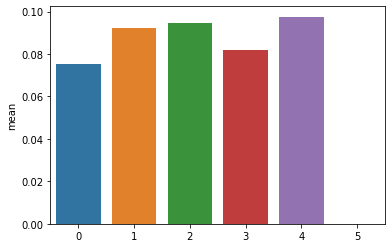

In [38]:
import seaborn as sb
# график зависимости наличия детей и наличия задолженности
sb.barplot(x=[0,1,2,3,4,5], y=children_debt['mean'])

##### Вывод 1:  
Из данных видно, что процент должников ниже у людей без детей, этой категории заёмщиков давать кредиты менее рискованно и они занимают долю 66% от общего числа! Исключение составляют клиенты с пятью детьми, у них долгов нет, но из общего количества их всего девять, этого количества мало для выводов. Семьи с одним и двумя детьми имеют самые высокие показатели задолженности.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [39]:
# сгруппируем данные по семейному положению, сумме должников и доле должников
familu_debt = data.groupby('family_status_id')['debt'].agg(['count', 'sum', 'mean'])
familu_debt = family_status.merge(familu_debt, on='family_status_id', how='left')
familu_debt.set_index('family_status_id')

,family_status,count,sum,mean
family_status_id,,,,
0,женат / замужем,12261,927,0.075606
1,гражданский брак,4134,385,0.093130
2,вдовец / вдова,951,63,0.066246
3,в разводе,1189,84,0.070648
4,не женат / не замужем,2796,273,0.097639


In [1]:
# график зависимости семейного положениея и возврата кредита в срок
sb.barplot(x=familu_debt['mean'], y=familu_debt['family_status'])

NameError: name 'sb' is not defined

##### Вывод 2:  
***Заёмщики не состоящие в браке имеют самый высокий показатель задолженности, как и люди в гражданском браке. Основная категория заёмщиков, а их больше половины, - это люди в браке, их показатель 7,5%, не самы низкий показатель, но и отличается менее, чем на оди процент от самых низкорискованных (вдовцы - 6,6%)***

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [41]:
# сгруппируем данные по категории дохода, сумме должников и доле должников
income_debt = data.groupby('total_income_category')['debt'].agg(['count', 'sum', 'mean'])
income_debt

,count,sum,mean
total_income_category,,,
A,25,2,0.080000
B,5013,354,0.070616
C,15922,1353,0.084977
D,349,21,0.060172
E,22,2,0.090909


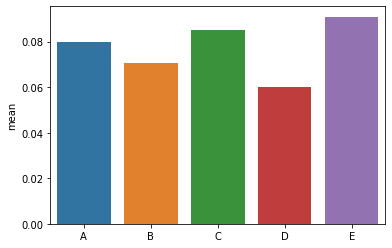

In [42]:
# график зависимости дохода и возврата кредита в срок
sb.barplot(x=['A', 'B', 'C', 'D', 'E'], y=income_debt['mean']);

##### Вывод 3:  
***Заёмщики категории D (30001–50000) самые надёжные, но их очень мало.  Люди из категории С(50001–200000) берут больше всего кредитов и процент невозвратов 8,4% - почти самый высокий.***

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

In [43]:
# сгруппируем данные по категории цели, сумме должников и доле должников
purpose_debt_category = data.groupby(['purpose_category'])['debt'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)
purpose_debt_category

,count,sum,mean
purpose_category,,,
операции с автомобилем,4279,400,0.093480
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118
операции с недвижимостью,10751,780,0.072551


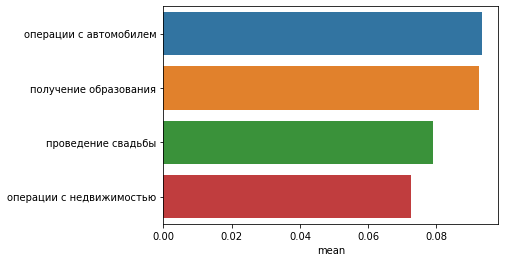

In [44]:
#график
sb.barplot(x=purpose_debt_category['mean'], y=['операции с автомобилем', 'получение образования', 'проведение свадьбы', 'операции с недвижимостью']);

Посмотрим должников по целям

In [45]:
# сгруппируем данные по категории цели, цели, сумме должников и доле должников
data.groupby(['purpose_category','purpose'])['debt'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)

count  sum  \
purpose_category         purpose                                              
получение образования    получение дополнительного образования     444   51   
операции с автомобилем   сделка с автомобилем                      455   50   
получение образования    получение высшего образования             425   46   
операции с автомобилем   сделка с подержанным автомобилем          481   51   
получение образования    профильное образование                    432   44   
операции с автомобилем   свой автомобиль                           473   47   
получение образования    заняться образованием                     408   39   
операции с автомобилем   на покупку автомобиля                     469   44   
                         автомобили                                476   44   
                         приобретение автомобиля                   459   42   
                         на покупку своего автомобиля              504   46   
получение образования    высшее образование                        446   40   
операции с недвижимостью строительство недвижимости                619   54   
получение образования    заняться высшим образованием              496   43   
                         дополнительное образование                455   38   
операции с автомобилем   автомобиль                                491   41   
операции с недвижимостью операции с недвижимостью                  672   55   
получение образования    получение образования                     440   36   
проведение свадьбы       свадьба                                   790   64   
операции с недвижимостью операции с коммерческой недвижимостью     645   52   
                         операции со своей недвижимостью           623   50   
                         покупка жилья для сдачи                   649   52   
проведение свадьбы       на проведение свадьбы                     763   61   
операции с недвижимостью строительство жилой недвижимости          620   48   
проведение свадьбы       сыграть свадьбу                           760   58   
операции с недвижимостью покупка жилья                             640   48   
операции с автомобилем   на покупку подержанного автомобиля        471   35   
операции с недвижимостью операции с жильем                         647   48   
получение образования    образование                               442   32   
операции с недвижимостью жилье                                     641   46   
                         покупка жилья для семьи                   637   45   
                         покупка коммерческой недвижимости         658   46   
                         покупка недвижимости                      616   43   
                         покупка жилой недвижимости                602   41   
                         недвижимость                              631   42   
                         строительство собственной недвижимости    628   41   
                         ремонт жилью                              604   35   
                         покупка своего жилья                      619   34   

                                                                     mean  
purpose_category         purpose                                           
получение образования    получение дополнительного образования   0.114865  
операции с автомобилем   сделка с автомобилем                    0.109890  
получение образования    получение высшего образования           0.108235  
операции с автомобилем   сделка с подержанным автомобилем        0.106029  
получение образования    профильное образование                  0.101852  
операции с автомобилем   свой автомобиль                         0.099366  
получение образования    заняться образованием                   0.095588  
операции с автомобилем   на покупку автомобиля                   0.093817  
                         автомобили                              0.092437  
                         приобретение автомобиля                 0.0

##### Вывод 4: 
Больше должников берут кредит на автомобиль и образование. Если смотреть более детально, то "получение дополнительного образования" и "сделка с автомобилем". Самая надёжная категория - кредит на недвижимость, эта категирия является еще и самой большой (больше 10000).

## Общий вывод:

***Я провел исследование влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.***

***В данных присутсвует много ошибок, таких как "отработанные дни" (разработчикам стоит обратить внимание). Категориальные данные надо строже упорядочить, возможно ввести списки для выбора категории, исключив самостоятельный ввод.***
***Можно ввсети дополительные категории к доходу и целям. Также я бы ввёл более детальное заполнение для неработающих людей, данные просто остаются пустыми.***

***Пропуски и ошибки удалось обработать. Методы обработки можно усовершенствовать: пропущенный возраст можно заполнять исходя из гендерности, а доход исходя из категории заёмщика.***

***Результаты:***

***- Процент должников ниже у людей без детей, этой категории заёмщиков давать кредиты менее рискованно и они занимают долю 66% от общего числа! Семьи с одним и двумя детьми имеют самые высокие показатели задолженности.***

***- Заёмщики не состоящие в браке имеют самый высокий показатель задолженности, как и люди в гражданском браке. Основная категория заёмщиков, а их больше половины, - это люди в браке, их показатель 7,5%, не самы низкий показатель, но и отличается менее, чем на оди процент от самых низкорискованных (вдовцы - 6,6%).***

***Так же выяснил, что заёмщики категории D (30001–50000) самые надёжные, но их очень мало.  Люди из категории С(50001–200000) берут больше всего кредитов и процент невозвратов 8,4% - почти самый высокий! И кредиты на недвижимость самые популярные и самые надёжные.***

***В целом надёжнее всего давать кредиты на недвижимость людям без детей, сотоящим в браке.***